In [2]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [64]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

# European social survey

1. Did people become less trusting from 2012 to 2014?
* Did people become happier from 2012 to 2014?
* Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
* Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
data='ess_combined_2012_2014.csv'

In [8]:
ess = pd.read_csv(data)
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


<IPython.core.display.Javascript object>

## 1. Did people become less trusting from 2012 to 2014?

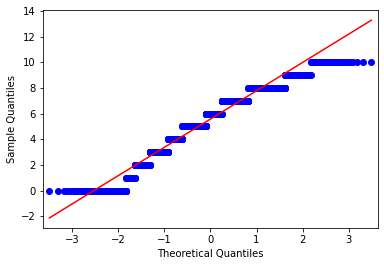

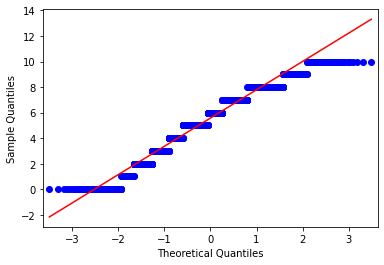

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


<IPython.core.display.Javascript object>

In [13]:
lt2012 = ess[ess["year"] == 6]
lt2014 = ess[ess["year"] == 7]

qqplot(lt2012["ppltrst"], line="s")
plt.show()
qqplot(lt2014["ppltrst"], line="s")
plt.show()

print(stats.describe(lt2012["ppltrst"]))
print(stats.describe(lt2014["ppltrst"]))

In [17]:
# we've shown above that the data is fairly normal. We can use T test.

t, p = stats.ttest_ind(lt2012["ppltrst"], lt2014["ppltrst"])
print(p < 0.05)
print(t)
print(p)

False
0.1443685081969842
0.8852130548889106


<IPython.core.display.Javascript object>

With this high p value and small t statistic we fail to reject the null.
That is, there is no significant difference in peoples trust between 2012 and 2014.

## 2. Did people become happier from 2012 to 2014?

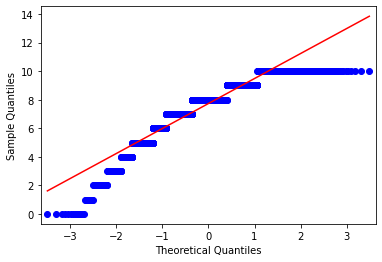

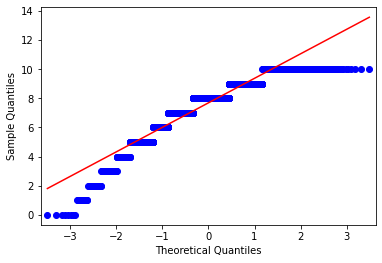

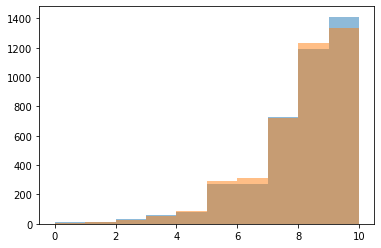

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


<IPython.core.display.Javascript object>

In [20]:
qqplot(lt2012["happy"], line="s")
plt.show()
qqplot(lt2014["happy"], line="s")
plt.show()

plt.hist(lt2012["happy"], alpha=0.5)
plt.hist(lt2014["happy"], alpha=0.5)
plt.show()

print(stats.describe(lt2012["happy"]))
print(stats.describe(lt2014["happy"]))

#This data is quite skewed to the right.
#It is not normal enough for T test.

In [21]:
stats.kruskal(lt2012["happy"], lt2014["happy"])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

<IPython.core.display.Javascript object>

In [22]:
# We have a high p value so we can again reject the null
# based on this, we conclude that all data samples
# are drawn from the same distribution.

<IPython.core.display.Javascript object>

## 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [55]:
lt2014["cntry"].unique()
three_c = lt2014[
    (lt2014["cntry"] == "CZ") | (lt2014["cntry"] == "CH") | (lt2014["cntry"] == "DE")
]
cz = lt2014[lt2014["cntry"] == "CZ"]
ch = lt2014[lt2014["cntry"] == "CH"]
de = lt2014[lt2014["cntry"] == "DE"]

# sclmeet is the variable we will use.

<IPython.core.display.Javascript object>

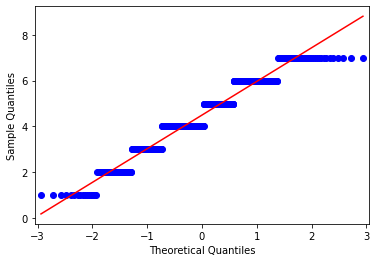

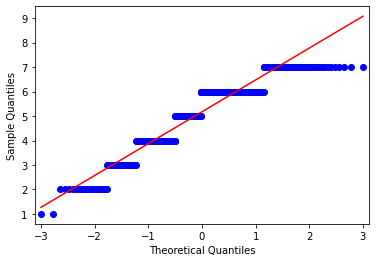

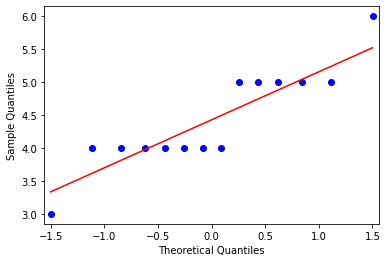

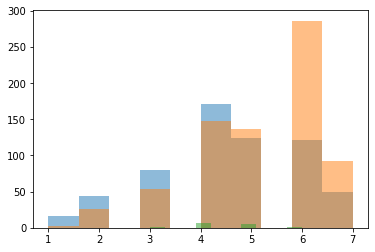

DescribeResult(nobs=606, minmax=(1, 7), mean=4.4950495049504955, variance=2.164438262008019, skewness=-0.22873689943815514, kurtosis=-0.49084441486724817)
DescribeResult(nobs=743, minmax=(1, 7), mean=5.174966352624495, variance=1.6944129031789972, skewness=-0.6382977240097087, kurtosis=-0.24036067403841654)
DescribeResult(nobs=14, minmax=(3, 6), mean=4.428571428571429, variance=0.5714285714285714, skewness=0.24891663306000175, kurtosis=-0.20118343195266197)


<IPython.core.display.Javascript object>

In [32]:
qqplot(cz["sclmeet"], line="s")
plt.show()
qqplot(ch["sclmeet"], line="s")
plt.show()
qqplot(de["sclmeet"], line="s")
plt.show()

plt.hist(cz["sclmeet"], alpha=0.5)
plt.hist(ch["sclmeet"], alpha=0.5)
plt.hist(de["sclmeet"], alpha=0.5)
plt.show()

print(stats.describe(cz["sclmeet"]))
print(stats.describe(ch["sclmeet"]))
print(stats.describe(de["sclmeet"]))


In [37]:
ess["cntry"].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
stats.kruskal(cz["sclmeet"], ch["sclmeet"], de["sclmeet"])

KruskalResult(statistic=78.92727862878502, pvalue=7.263721926337026e-18)

<IPython.core.display.Javascript object>

In [41]:
# with the low p value we can reject the null, that there is no difference in medians
#Rather can say there is a statistical difference between at least one of the three means.


<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'sclmeet'}, xlabel='cntry'>

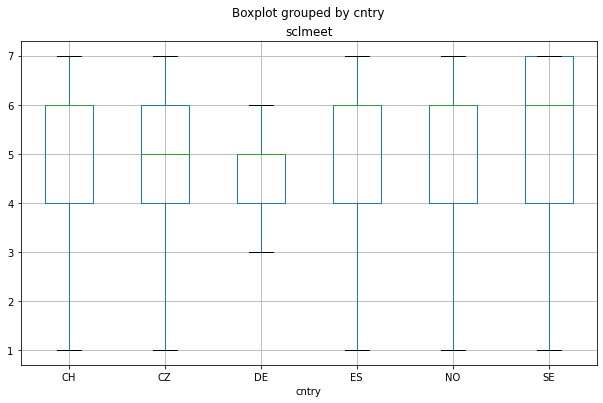

<IPython.core.display.Javascript object>

In [47]:
ess.boxplot("sclmeet", by="cntry", figsize=(10, 6))

In [48]:
# DE appears to be the odd median out.

<IPython.core.display.Javascript object>

## 4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

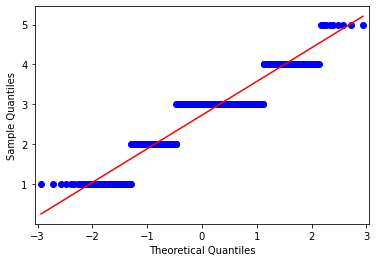

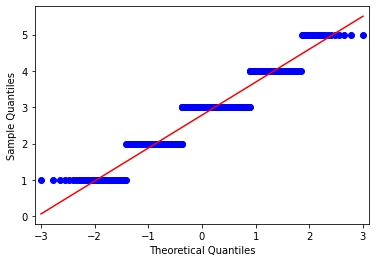

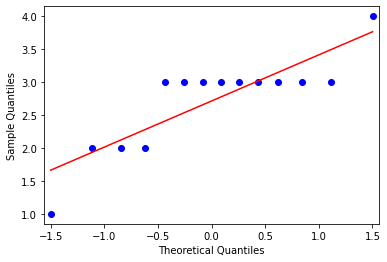

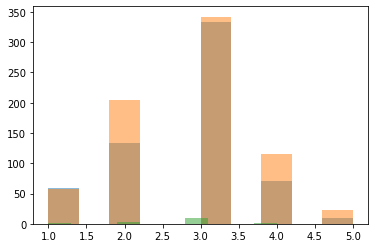

DescribeResult(nobs=606, minmax=(1, 5), mean=2.7293729372937294, variance=0.7134167962250769, skewness=-0.27883074625381743, kurtosis=0.21759096064150674)
DescribeResult(nobs=743, minmax=(1, 5), mean=2.784656796769852, variance=0.821489336230696, skewness=0.056518838123621226, kurtosis=-0.05699247701187771)
DescribeResult(nobs=14, minmax=(1, 4), mean=2.7142857142857144, variance=0.5274725274725275, skewness=-0.7909810627737351, kurtosis=0.6354166666666665)


<IPython.core.display.Javascript object>

In [50]:
qqplot(cz["sclact"], line="s")
plt.show()
qqplot(ch["sclact"], line="s")
plt.show()
qqplot(de["sclact"], line="s")
plt.show()

plt.hist(cz["sclact"], alpha=0.5)
plt.hist(ch["sclact"], alpha=0.5)
plt.hist(de["sclact"], alpha=0.5)
plt.show()

print(stats.describe(cz["sclact"]))
print(stats.describe(ch["sclact"]))
print(stats.describe(de["sclact"]))

In [51]:
# these appear to be relative normal,
# We will use ANOVA test to compare variances

<IPython.core.display.Javascript object>

In [56]:
f, p = stats.f_oneway(cz["sclact"], ch["sclact"], de["sclact"])

print(f)
print(p)

0.6805323062052006
0.5065197308755334


<IPython.core.display.Javascript object>

In [63]:
# Low f score and high p value imply there is no significant difference between groups.

<IPython.core.display.Javascript object>

c:\users\matth\appdata\local\programs\python\python37\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


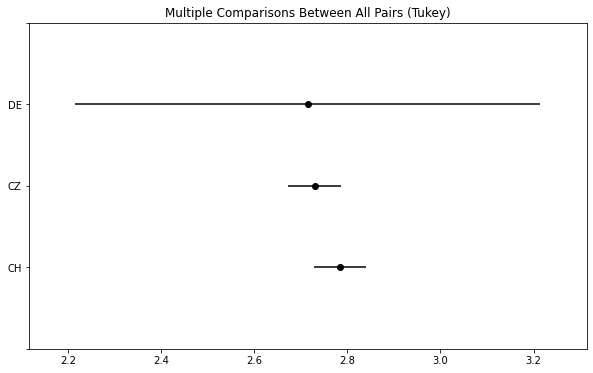

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.0553,0.4848,-0.168,0.0575,False
CH,DE,-0.0704,0.9,-0.626,0.4853,False
CZ,DE,-0.0151,0.9,-0.5719,0.5417,False


<IPython.core.display.Javascript object>

In [62]:
tukey_results = pairwise_tukeyhsd(three_c["sclact"], three_c["cntry"])


# Plot results
tukey_results.plot_simultaneous()
plt.show()

# Show summary table of results
tukey_results.summary()

# Ruff figural fluency test

Notes: Casenr is a unique identifier. When you're comparing data points between measurements, pivot() from pandas will be particularly useful.

1. Is there a significant difference in the number of unique designs drawn by the same participants from measurement 2 to measurement 3?
2. Is there a significant difference in the number of perseverative errors drawn by the same participants from measurement 2 to measurement 3?

In [65]:
data_url = "rfft.csv"

rfft = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

In [66]:
rfft.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


<IPython.core.display.Javascript object>

## 1. Is there a significant difference in the number of unique designs drawn by the same participants from measurement 2 to measurement 3?

In [79]:
m2 = rfft[rfft["Measurement"] == "Measurement 2 (2006-2008)"]
m3 = rfft[rfft["Measurement"] == "Measurement 3 (2008-2012)"]

<IPython.core.display.Javascript object>

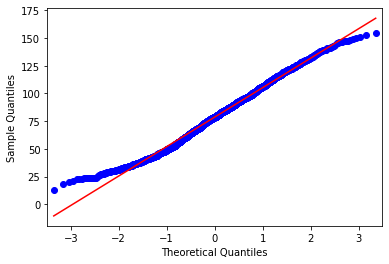

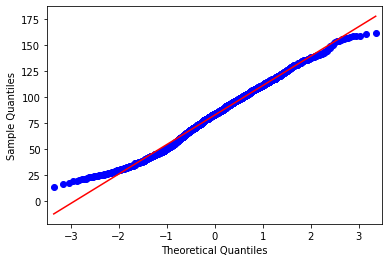

DescribeResult(nobs=2515, minmax=(13.0, 155.0), mean=78.69244532803181, variance=707.0341513370058, skewness=0.1471876477093264, kurtosis=-0.5467621966747225)
DescribeResult(nobs=2515, minmax=(13.5, 161.5), mean=82.7079522862823, variance=808.8049884464099, skewness=0.020360395669875728, kurtosis=-0.5479245402887649)


<IPython.core.display.Javascript object>

In [82]:
qqplot(m2["Unique"], line="s")
plt.show()
qqplot(m3["Unique"], line="s")
plt.show()

print(stats.describe(m2["Unique"]))
print(stats.describe(m3["Unique"]))

In [ ]:
#Are data looks relatively normal, so we can continue with rel_ttest 
#or related t test since variables are dependent on one another

In [81]:
stats.ttest_rel(m2["Unique"], m3["Unique"])

Ttest_relResult(statistic=-10.88544039426271, pvalue=5.3585747477799544e-27)

<IPython.core.display.Javascript object>

In [118]:
# t is high and p s low, so we reject null
# that is, there is a significant difference between unique designs by the same participants between Measurements 2 and 3.

<IPython.core.display.Javascript object>

In [124]:
rfft_uni = rfft.pivot("Casenr", "Measurement", values="Unique")
rfft_uni["diff"] = (
    rfft_uni["Measurement 2 (2006-2008)"] - rfft_uni["Measurement 3 (2008-2012)"]
)

signal = rfft_uni["diff"].mean()
noise = rfft_uni["diff"].std() / np.sqrt(rfft_uni["diff"].size)

<IPython.core.display.Javascript object>

In [126]:
ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise
ci_lo, ci_hi

(-4.738527190148432, -3.2924867263525623)

<IPython.core.display.Javascript object>

In [ ]:
#Using 95% CI,
#We can expect an increase of 3.3 to 4.7 of unique designs between measurement 2 and measurement 3

## 2. Is there a significant difference in the number of perseverative errors drawn by the same participants from measurement 2 to measurement 3?

In [85]:
rfft.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


<IPython.core.display.Javascript object>

In [112]:
rfft_piv = rfft.pivot("Casenr", "Measurement", values="Perseverative")

<IPython.core.display.Javascript object>

In [113]:
rfft_piv.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


<IPython.core.display.Javascript object>

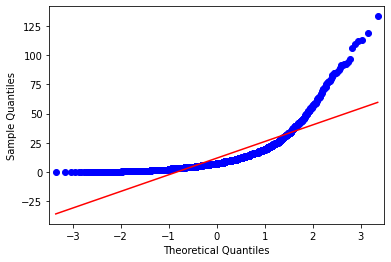

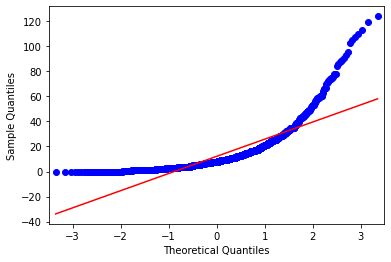

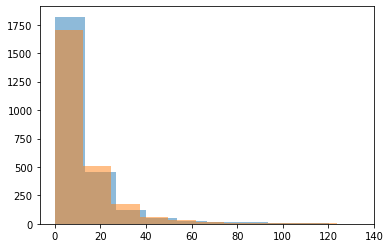

DescribeResult(nobs=2515, minmax=(0.0, 133.5), mean=11.769980119284295, variance=203.46626233055127, skewness=3.2001427277175862, kurtosis=13.913985994081123)
DescribeResult(nobs=2515, minmax=(0.0, 124.0), mean=12.100198807157058, variance=187.75009940357853, skewness=3.03381078165085, kurtosis=13.347862924837408)


<IPython.core.display.Javascript object>

In [114]:
qqplot(rfft_piv['Measurement 2 (2006-2008)'], line="s")
plt.show()
qqplot(rfft_piv['Measurement 3 (2008-2012)'], line="s")
plt.show()


plt.hist(rfft_piv['Measurement 2 (2006-2008)'], alpha=0.5)
plt.hist(rfft_piv['Measurement 3 (2008-2012)'], alpha=0.5)
plt.show()

print(stats.describe(rfft_piv['Measurement 2 (2006-2008)']))
print(stats.describe(rfft_piv['Measurement 3 (2008-2012)']))


In [115]:
# Data is not normal, Since these are dependent samples and the data is not normal,
# we will use Wilcoxon signed-rank test

<IPython.core.display.Javascript object>

In [116]:
stats.wilcoxon(
    (rfft_piv["Measurement 2 (2006-2008)"] - rfft_piv["Measurement 3 (2008-2012)"])
)

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

<IPython.core.display.Javascript object>

In [117]:
# there is a significant difference in measurements between measurement2 and measurement3.
# (because high W statistic and low p)

<IPython.core.display.Javascript object>